# **Bike Demand Prediction using Multiple Linear Regression**

## **1. Introduction**
### **1.1. Problem Statement**
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To recover and prepare for post-pandemic demand, the company seeks to understand the factors affecting bike demand in the American market. By identifying significant predictors of demand and analyzing their impact, BoomBikes aims to optimize business strategies, meet customer needs, and gain a competitive edge.

- I am required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## **2. Data Understanding**
### **2.1. Import necessary libraries**

In [460]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

# Pandas by default doesn't display all the columns in the dataframe
# As we're going to work on a large dataset, the following setting will help read data from all the columns
pd.set_option('display.max_columns', None)

# Disable scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# For some of the columns we may have to see the data from all rows
# Eg: Categorical columns.
pd.set_option('display.max_rows', None)

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 


### **2.2. Data Overview**

In [461]:
# Load the data from day.csv file. 
# Using the read_csv function from the pandas library, we can load the data from the csv to a pandas dataframe.
df = pd.read_csv('Data/day.csv')

# Shape property of the pandas dataframe returns the dimention of the dataframe
# The return value will contain the number of rows and columns in the dataframe
df.shape

# Quick observation
#-------------------
# 1. There are 730 rows and
# 2. There are 16 columns
#-------------------

(730, 16)

In [462]:
# Take a quick look at the first 5 rows of data to get an understanding
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [463]:
df.info()

# Quick observation
#-------------------
# 1. There are no null values across the dataset
# 2. Most of the columns are numeric
#-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Information from the data dictionary - Column Information
---------------------------------------------------------
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## **3. Data Preparation**
### **3.1. Data Cleaning**
- There are no null or missing values. Hence data cleaning isn't required
- We can drop 'instant' and 'dteday' columns as they both are either not useful or the information is in other columns

In [464]:
df = df.drop(['instant', 'dteday'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


### **3.2. Data Transformation**
- Convert categorical numeric variables (e.g., `season`, `weathersit`) into string categories.


In [465]:
# The following columns / features are dependent on the above categorical independent variables and continuous independent variables
target_columns = ['cnt']

# The following columns are observed to be categorical independent variables as they have descrete values
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# The following columns are observed to be continuous independent variables
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

In [466]:
# Created dictionaries to show the readable label mapping for the values in categorical columns
dict_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
dict_yr = {0: 2018, 1: 2019}
dict_mnth = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dict_holiday = {0: 'Non_holiday', 1: 'Holiday'}
dict_weekday = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
dict_workingday = {0: 'Non_working_day', 1: 'Working_day'}
dict_weathersit = {1: 'Clear_Partly-Cloudy', 2: 'Mist_Cloudy', 3: 'Light-Snow_Light-Rain', 4: 'Heavy-Rain_Snow_Fog'}

In [467]:
# Loop through the categorical columns and map the labels in the associated dictionaries
column_to_dict = {
    'season': dict_season,
    'yr': dict_yr,
    'mnth': dict_mnth,
    'holiday': dict_holiday,
    'weekday': dict_weekday,
    'workingday': dict_workingday,
    'weathersit': dict_weathersit
}

for col in cat_columns:
    df[col] = df[col].map(column_to_dict[col])
    
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,Non_holiday,Sat,Non_working_day,Mist_Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,2018,Jan,Non_holiday,Sun,Non_working_day,Mist_Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,2018,Jan,Non_holiday,Mon,Working_day,Clear_Partly-Cloudy,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,2018,Jan,Non_holiday,Tue,Working_day,Clear_Partly-Cloudy,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,2018,Jan,Non_holiday,Wed,Working_day,Clear_Partly-Cloudy,9.31,11.46,43.70,12.52,82,1518,1600


In [468]:
# Order the categorical variables based on their keys

df['season'] = pd.Categorical(df['season'], categories=list(dict_season.values()), ordered=True)
df['yr'] = pd.Categorical(df['yr'], categories=list(dict_yr.values()), ordered=True)
df['mnth'] = pd.Categorical(df['mnth'], categories=list(dict_mnth.values()), ordered=True)
df['holiday'] = pd.Categorical(df['holiday'], categories=list(dict_holiday.values()), ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], categories=list(dict_weekday.values()), ordered=True)
df['workingday'] = pd.Categorical(df['workingday'], categories=list(dict_workingday.values()), ordered=True)
df['weathersit'] = pd.Categorical(df['weathersit'], categories=list(dict_weathersit.values()), ordered=True)

In [469]:
# Convert the categorical variables to type 'category'
df[cat_columns] = df[cat_columns].astype('category')
df.select_dtypes('category').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 6.6 KB


## **4. Exploratory Data Analysis (EDA)**
### **4.1. Univariate Analysis**

- Visualize the distribution of target variables

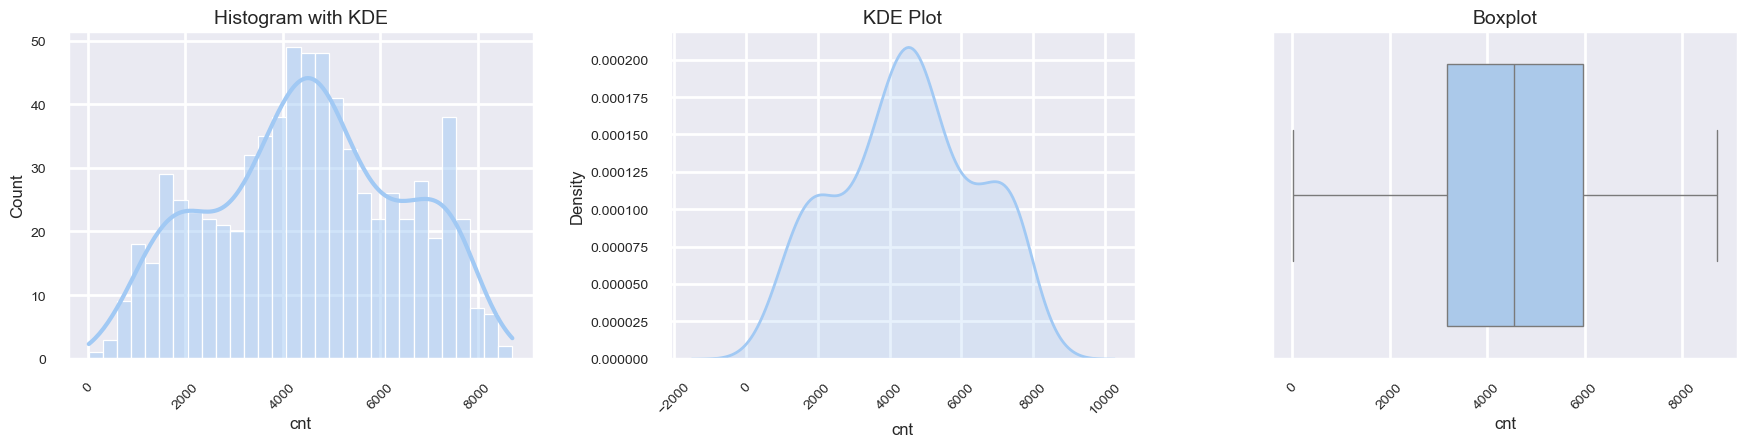

In [470]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
axes = axes.flatten() 

plots = [
    lambda ax: sns.histplot(data=df, x='cnt', bins=30, kde=True, ax=ax).set_title('Histogram with KDE'),
    lambda ax: sns.kdeplot(data=df, x='cnt', shade=True, ax=ax).set_title('KDE Plot'),
    lambda ax: sns.boxplot(data=df, x='cnt', ax=ax).set_title('Boxplot')
]

for i, plot in enumerate(plots):
    axes[i].tick_params(axis='x', rotation=45)
    plot(axes[i]) 

for j in range(len(plots), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Looking into the KDE plot the target variable 'cnt' is normally distributed.
#-------------------

- Visualize distributions of key categorical features. (discrete independent categorical variables)

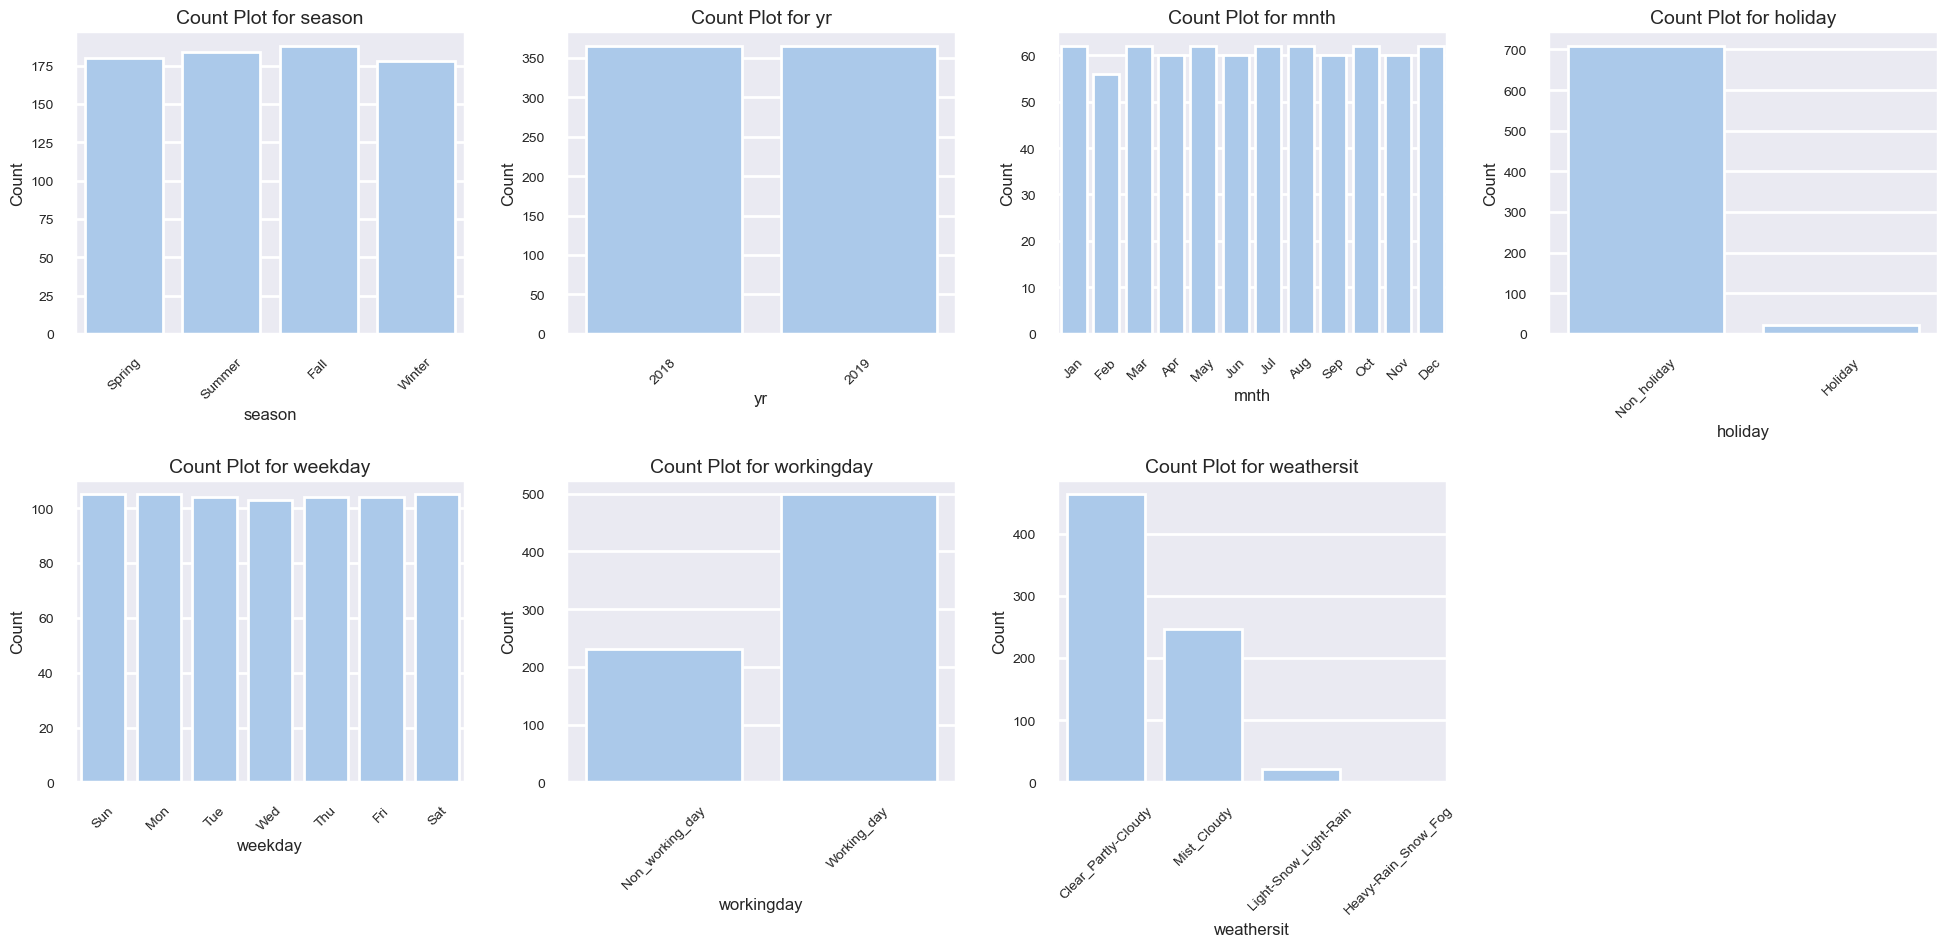

In [471]:
cat_rows = (len(cat_columns) + 3) // 4
fig, axes = plt.subplots(cat_rows, 4, figsize=(20, 5 * cat_rows))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Independent variables ['holiday', 'workingday', 'weathersit'] has visible impact on the data
#-------------------

- Visualize distributions of key numerical features. (continuous independent variables)

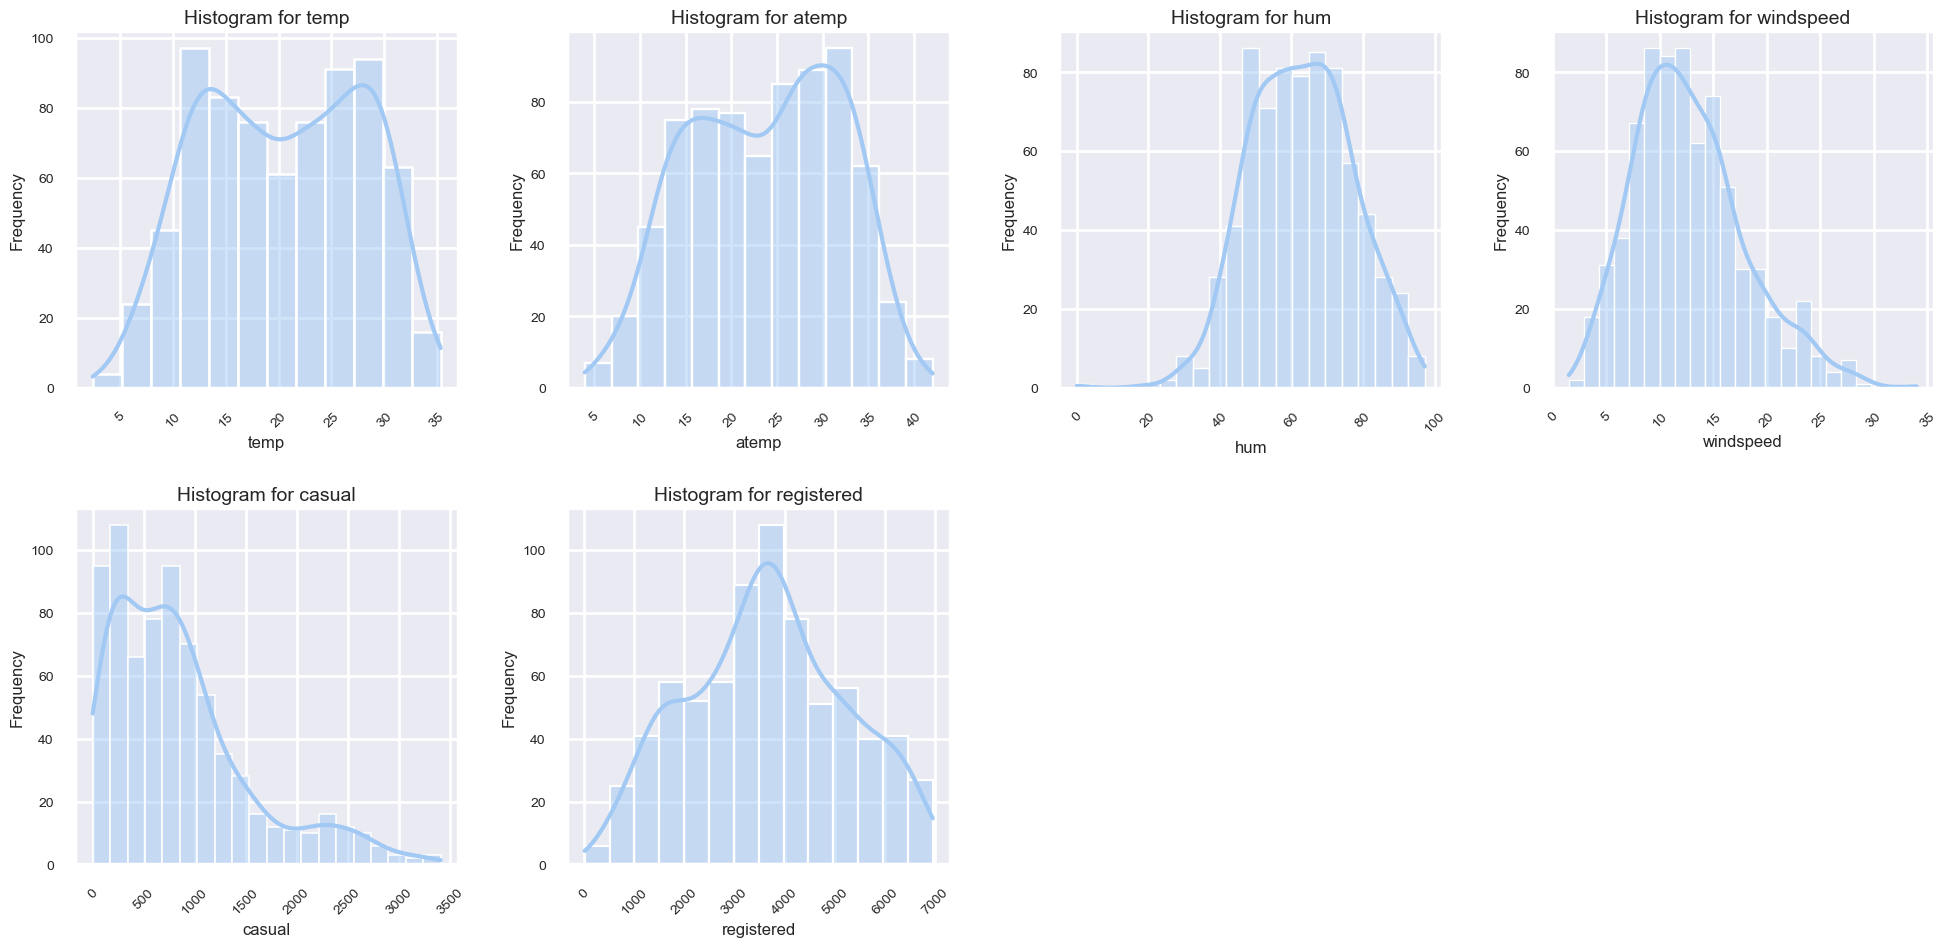

In [472]:
num_rows = (len(num_columns) + 3) // 4
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. 'registered' has a distribution similar to the target variable 'cnt'
#-------------------

### **4.2. Bivariate Analysis**
- Examine relationships between the target variable (`cnt`) and independent numeric variables.

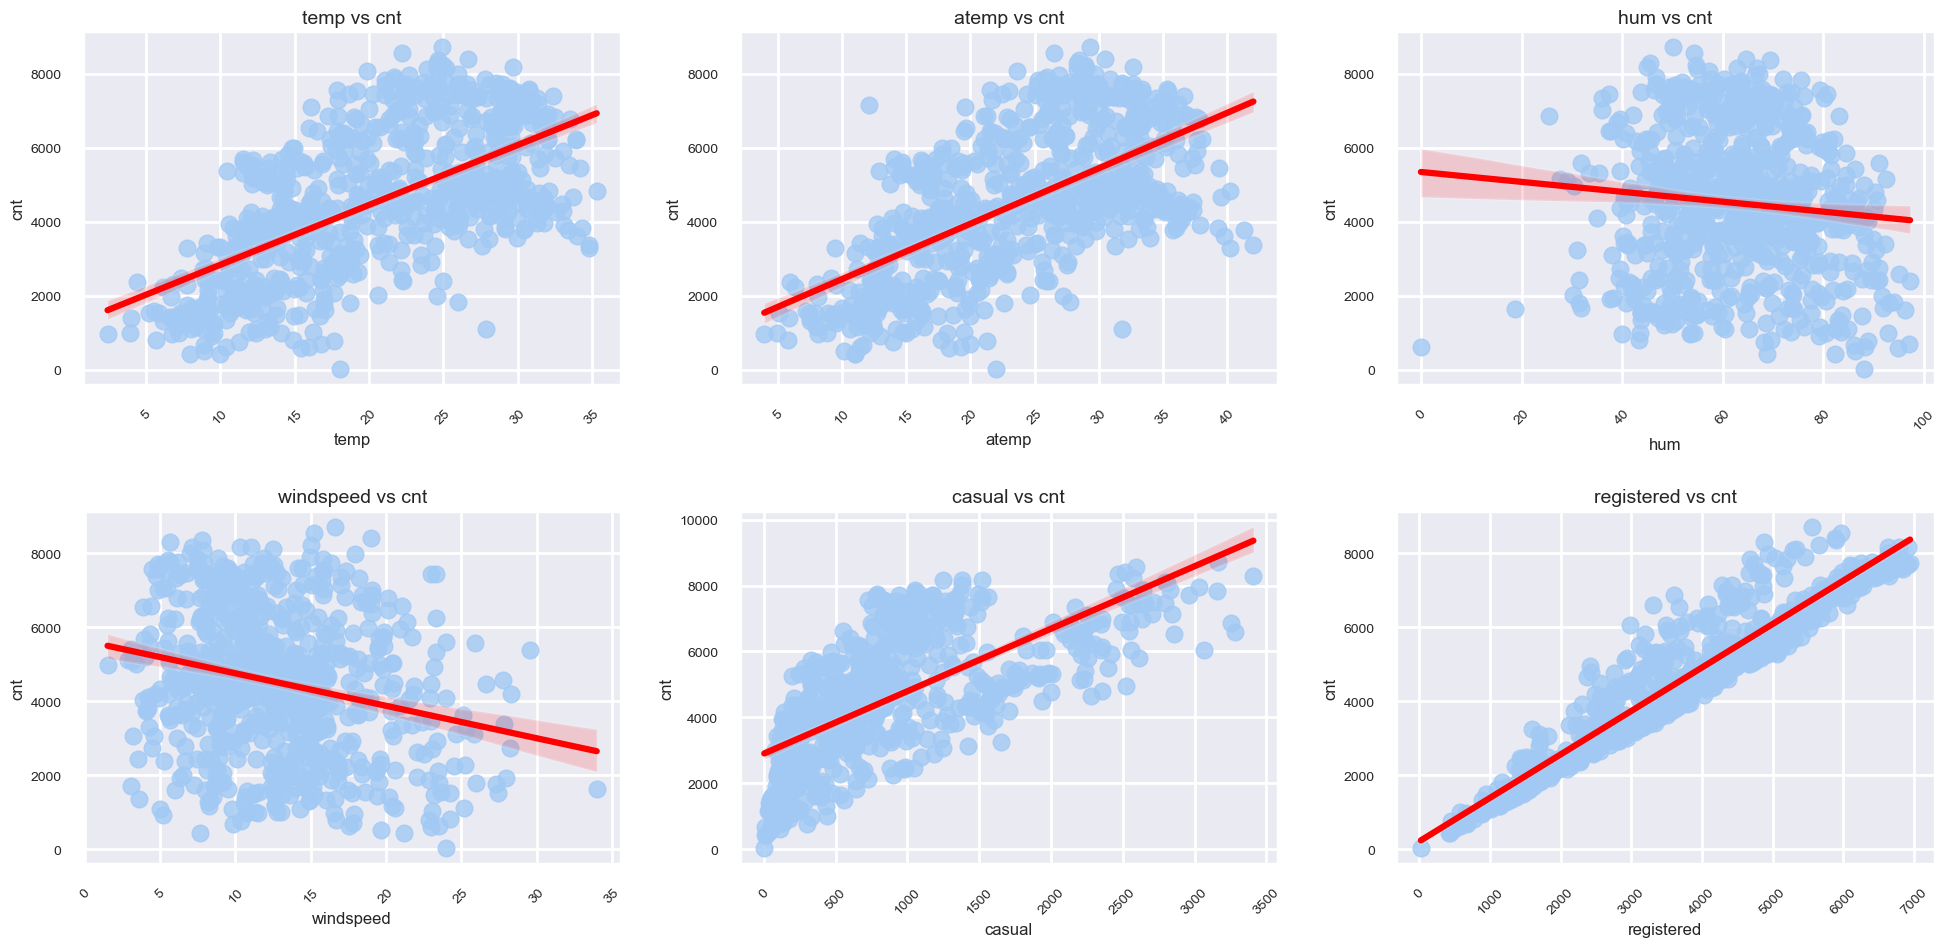

In [473]:
num_rows = (len(num_columns) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(num_columns): 
    sns.regplot(data=df, x=col, y='cnt', ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs cnt')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('cnt')
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra axes
for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. 4 out of 6 continuous independed variables are directly proportional
# 2. The rest are inversely proportional ie., when ['hum', 'windspeed'] increases, there's less demand for the bikes
#-------------------

- Examine relationships between the target variable (`cnt`) and independent categorical variables.

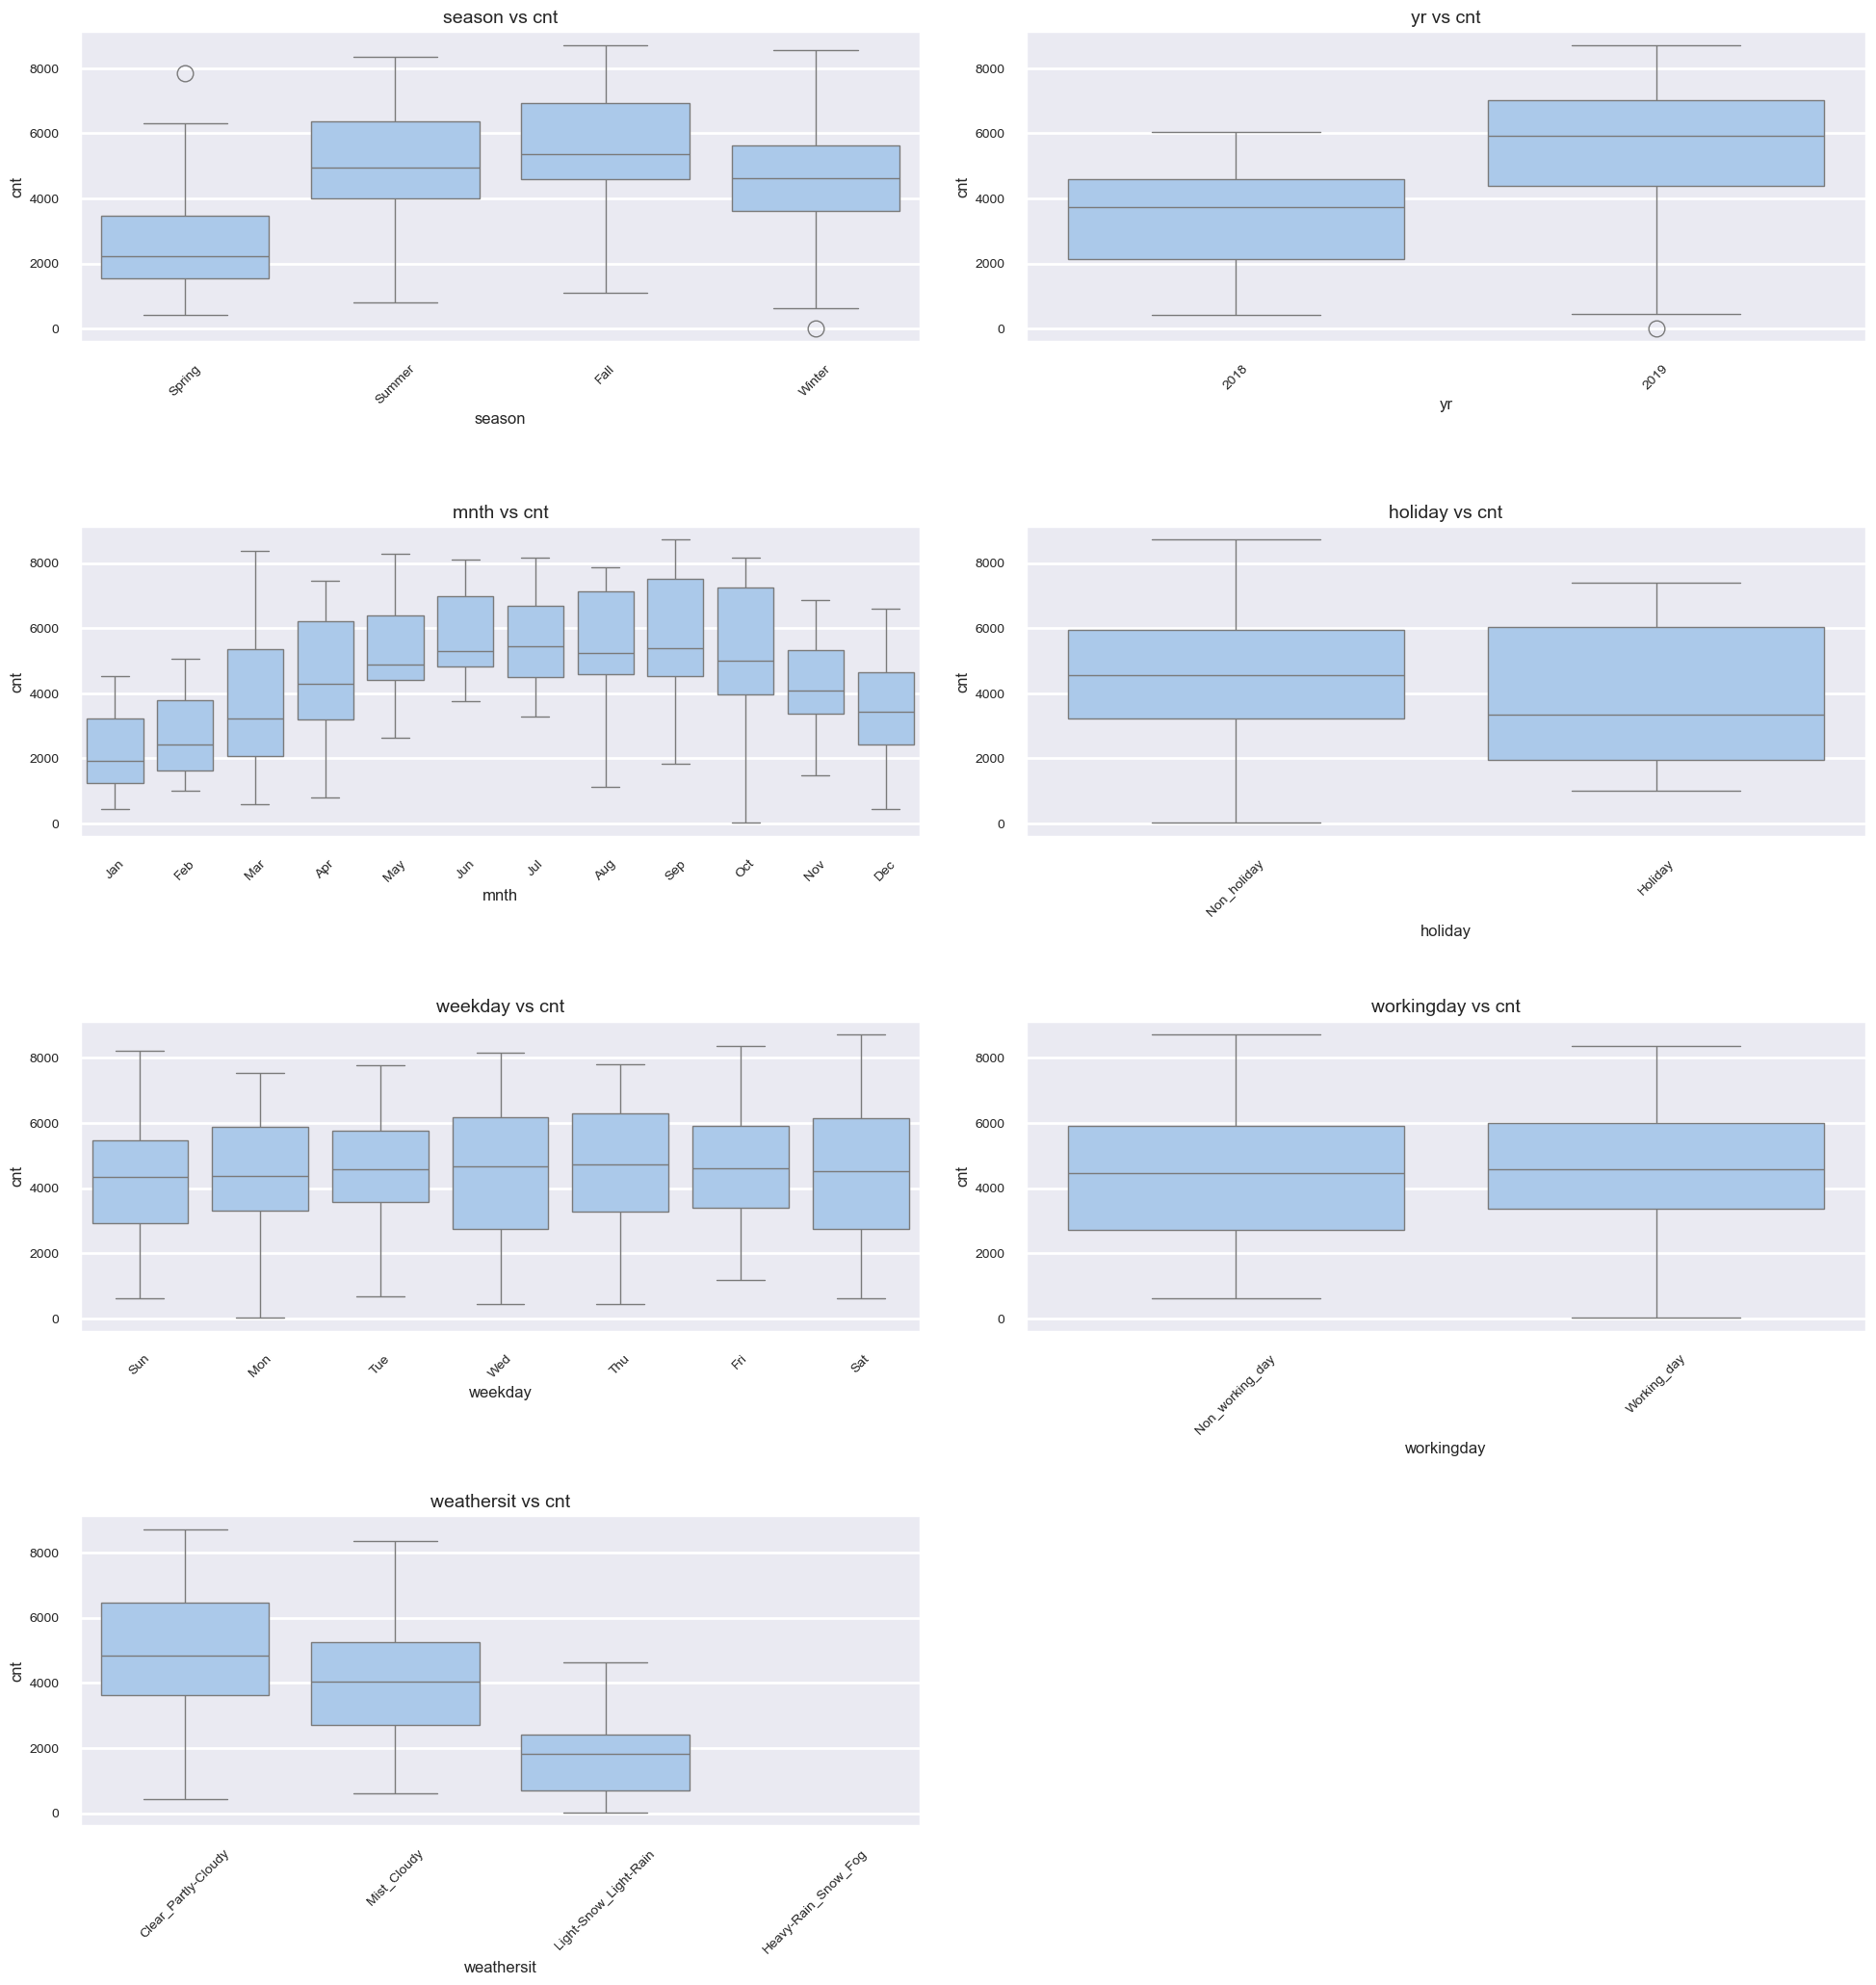

In [474]:
fig, axes = plt.subplots(len(cat_columns), 2, figsize=(20, 5 * len(cat_columns)))
axes = axes.flatten()
num_column_to_compare = 'cnt'

for i, col in enumerate(cat_columns):
    sns.boxplot(data=df, x=col, y=num_column_to_compare, ax=axes[i])
    axes[i].set_title(f'{col} vs {num_column_to_compare}')
    axes[i].set_xlabel(col)    
    axes[i].set_ylabel(num_column_to_compare)
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(cat_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Maximum demand is in fall season
# 2. Demand in 2019 is more than 2018 which shows growth in the demand
# 3. As expected weather situation plays a major role in the demand. During rainy or snow season the demand is at the lowest.
#-------------------

### **4.3. Correlation Analysis**
- Create a heatmap to identify correlated variables.

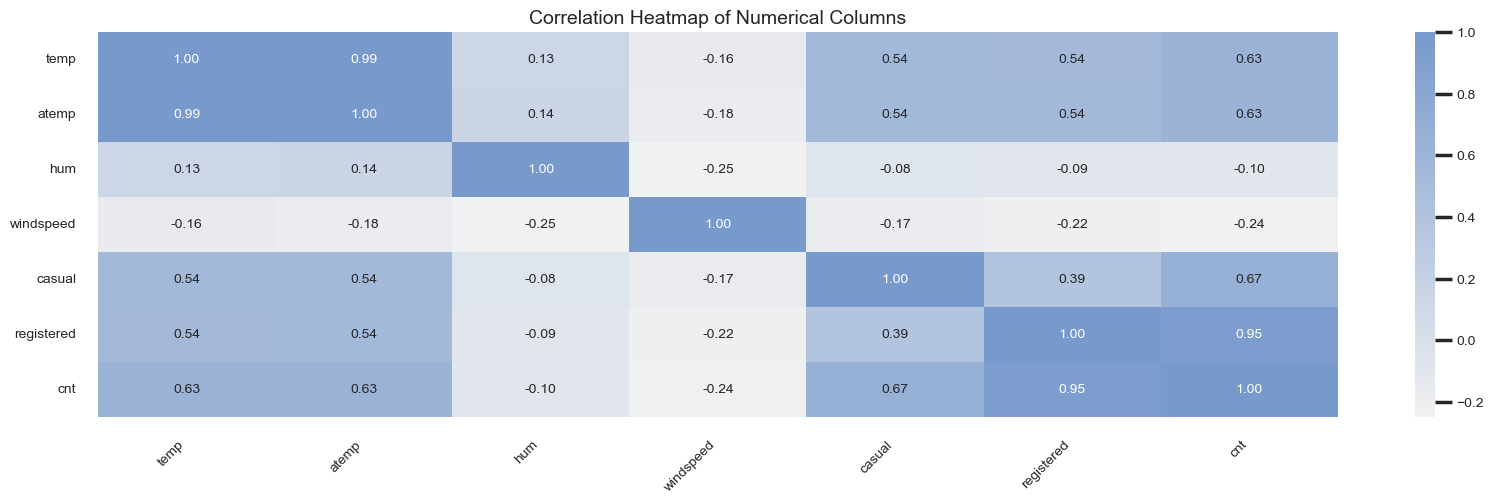

In [475]:
plt.figure(figsize=(20, 5))
correlation = df[num_columns + target_columns].corr()
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10}, cmap=sns.light_palette("#79c", as_cmap=True), fmt='.2f')

plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Quick observation
#-------------------
# 1. 'cnt' is highly co-related with 'registered' customers
# 2. There's a decent co-relation between temperature and the demand
# 3. As noticed in previous analysis results, the humidity and windspeed has negative co-relation with the demand
#-------------------

In [476]:
# The 'casual' and 'registered' variables can be dropped as it is duplicating to the target variable and may affect the r2 calculation
df = df.drop(['casual', 'registered'], axis=1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

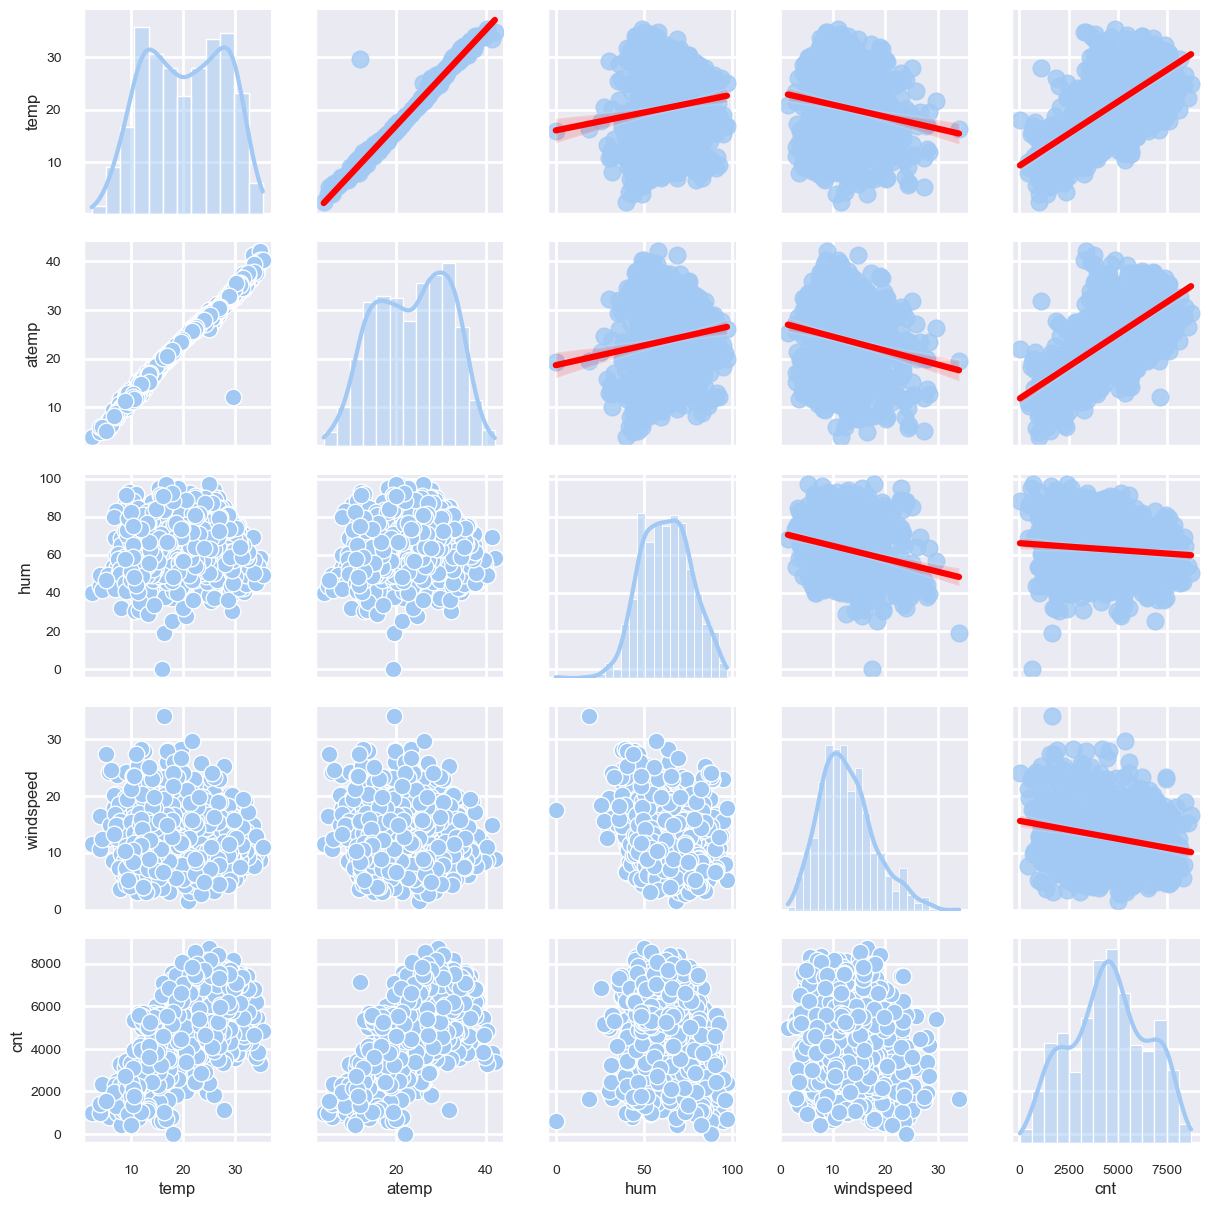

In [477]:
g = sns.PairGrid(df)
g.map_upper(sns.regplot, line_kws={'color': 'red'})
g.map_lower(sns.scatterplot) 
g.map_diag(sns.histplot, kde=True) 
plt.show()

# Quick observation
#-------------------
# 1. Looking into the below graph, it's not a single or simple linear model, the target variable is impacted by multiple dependant variables
#-------------------

## **5. Data Preparation for Modeling**

### **5.1. Multiple Linear Regression - Decision**

 - The target variable is dependent on multiple variables
 - The target variable is a continuous variable
 - We will use multiple linear regression model to solve the situation

### **5.2. Encoding Categorical Variables**
- Convert categorical variables into dummy/indicator variables.

In [478]:
# Reverse mapping to encode the data
dict_yr_reverse = {v: k for k, v in dict_yr.items()}
dict_holiday_reverse = {v: k for k, v in dict_holiday.items()}
dict_workingday_reverse = {v: k for k, v in dict_workingday.items()}

df['yr'] = df['yr'].map(dict_yr_reverse)
df['holiday'] = df['holiday'].map(dict_holiday_reverse)
df['workingday'] = df['workingday'].map(dict_workingday_reverse)

df.shape

(730, 12)

### **5.3. Create Dummies To Extend Categorical Variables**

In [479]:
season = pd.get_dummies(df['season'], dtype='int', drop_first=True)
mnth = pd.get_dummies(df['mnth'], dtype='int', drop_first=True)
weekday = pd.get_dummies(df['weekday'], dtype='int', drop_first=True)
weathersit = pd.get_dummies(df['weathersit'], dtype='int', drop_first=True)

In [480]:
df = df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)

In [481]:
df = pd.concat([df, season, mnth, weekday, weathersit], axis=1)

In [482]:
print(df.shape)
print(df.columns)

(730, 31)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Mist_Cloudy', 'Light-Snow_Light-Rain',
       'Heavy-Rain_Snow_Fog'],
      dtype='object')


### **5.4. Splitting the Dataset - Train and Test**
- Split the data into training and testing sets.

In [483]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


### **5.5. Rescaling - Fit and Transform**
- Rescaling the Features (Min-Max Scaling or Standardization)
    - Min-Max Scaling formula: (x - min(x)) / max(x) - min(x) The result will be between 0 and 1
    - Standardization Scaling formula: (x - mean(x)) / standard-deviation(x) The result mean will be 0 and sigma (standard deviation) 1

In [484]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
576,1,0,1,29.25,33.14,70.42,11.08,7216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,16.98,20.67,62.12,10.79,4066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.49,11.59,48.33,23.50,1796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.44,18.88,48.96,8.71,4220,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
111,0,0,1,13.80,16.10,72.96,14.71,1683,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [485]:
# Create an object of type MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()

# List of numeric columns to apply scaling
cols_to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit computes the minimum and maximum values for each column in the training dataframe
# transform scales the columns to range between 0 and 1
# The scaler is fitted only on the training data to avoid the scenario where the model has already seen the test data
# The test data is meant to simulate unseen data. If the scaler is fit in test data then we're letting the model to learn test (future state) data.
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

# transform scales the columns in test dataframe, by using hte min and max values computed from the training dataframe
# This will be used later during predictions and/or evaluations
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

print(df_train[cols_to_scale].describe())
# print(df_test[cols_to_scale].describe())

        temp  atemp    hum  windspeed    cnt
count 510.00 510.00 510.00     510.00 510.00
mean    0.54   0.51   0.65       0.32   0.51
std     0.23   0.21   0.15       0.17   0.22
min     0.00   0.00   0.00       0.00   0.00
25%     0.34   0.33   0.54       0.20   0.36
50%     0.54   0.53   0.65       0.30   0.52
75%     0.74   0.69   0.75       0.41   0.68
max     1.00   1.00   1.00       1.00   1.00


## **6. Training the Model**

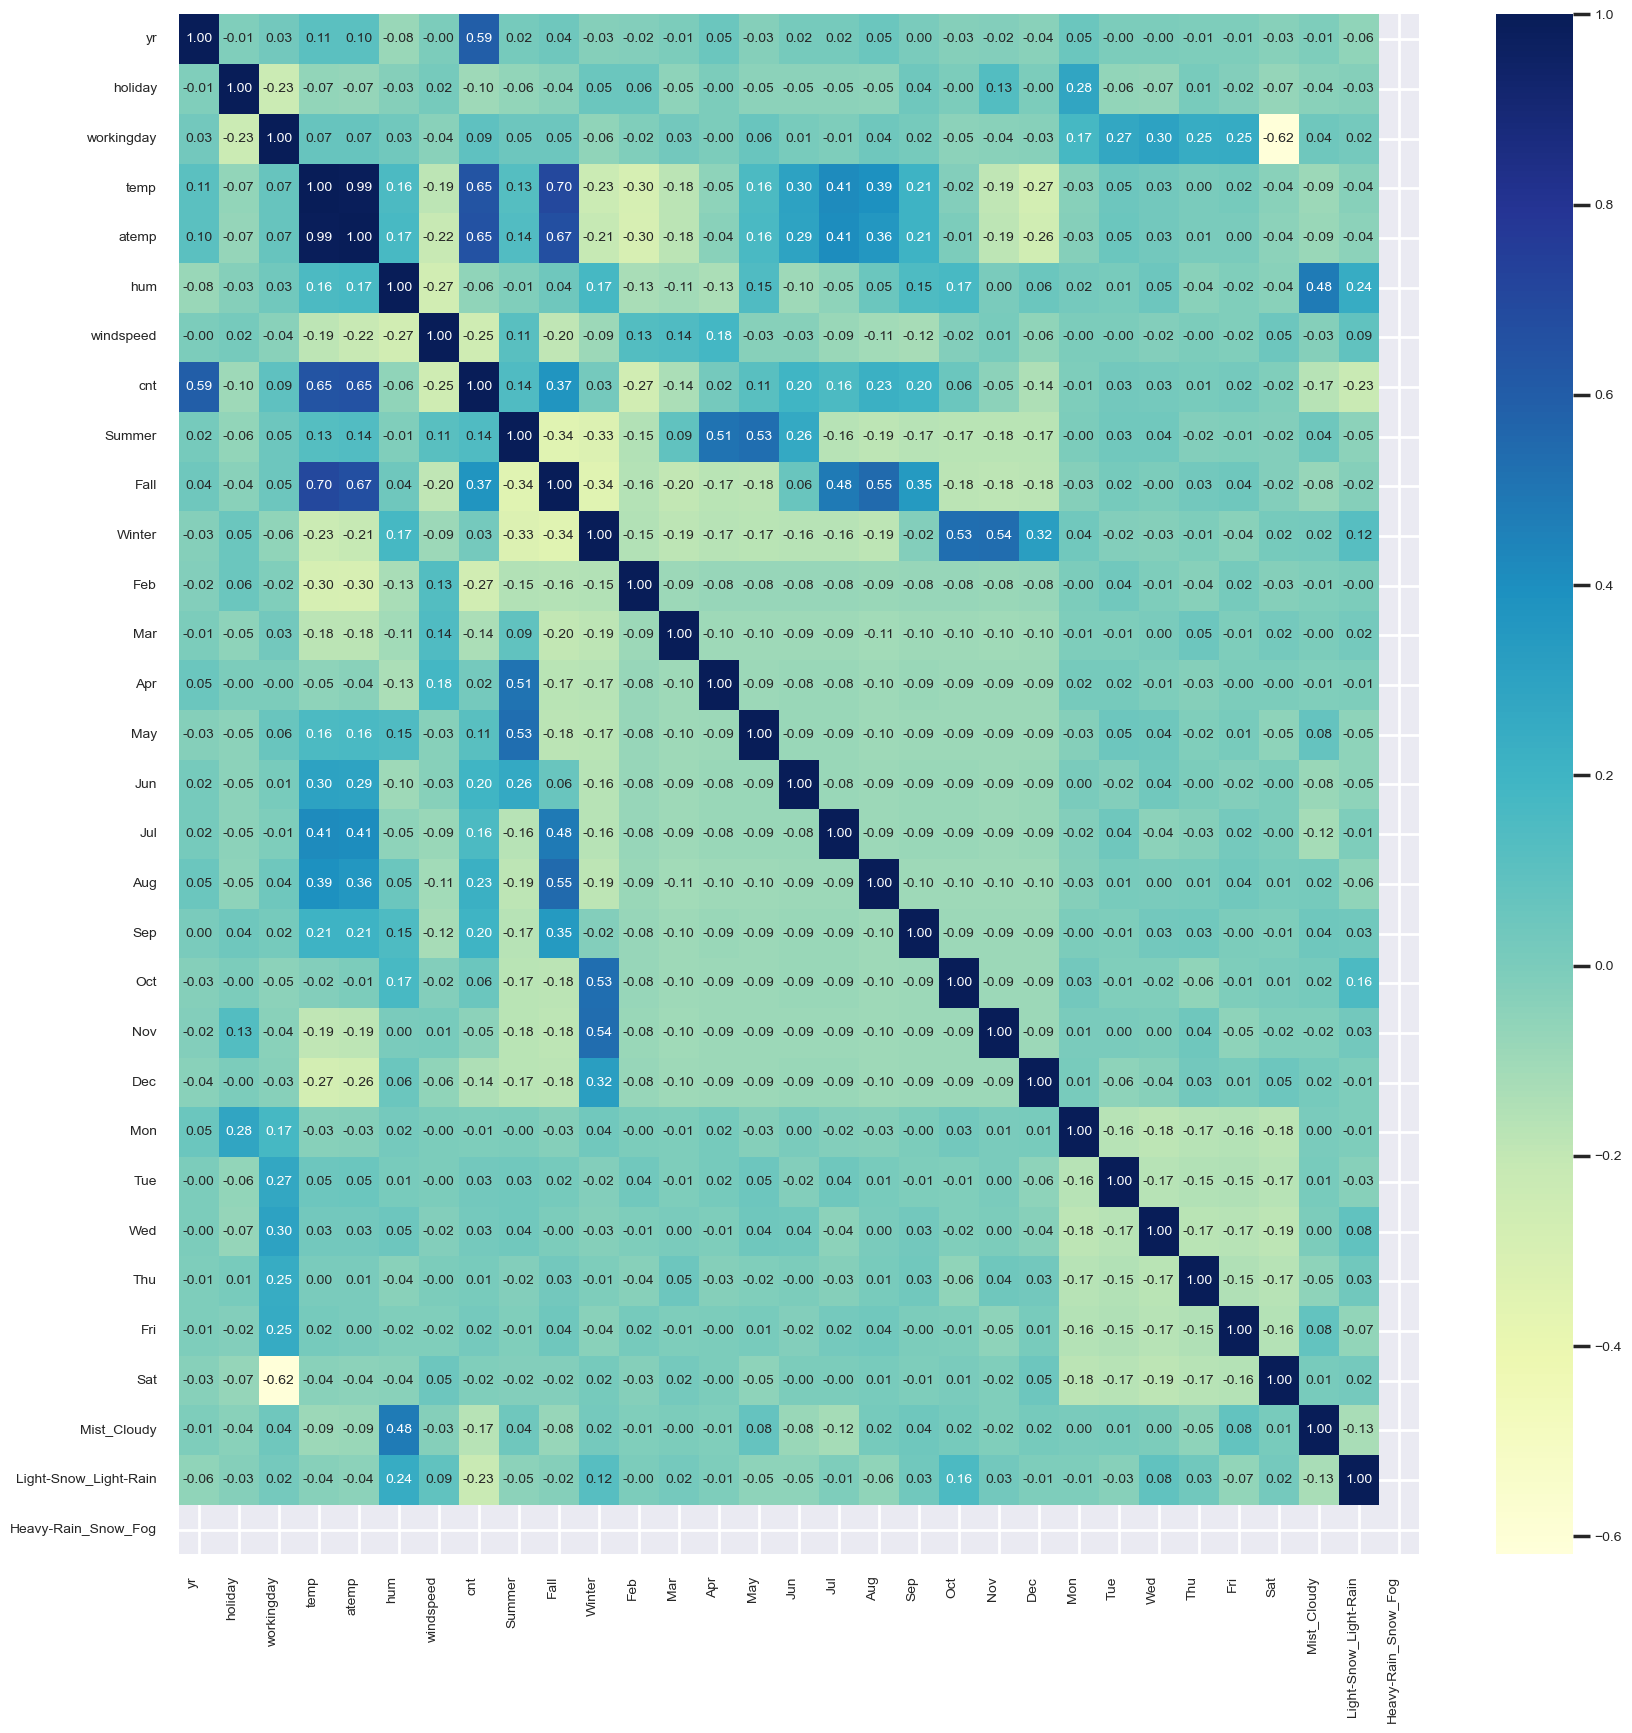

In [486]:
# The shape of the dataframe has changed after the dummy variable creation.
# Let us find the co-relation between all the columns in the dataframe to identify the interdependency
plt.figure(figsize=(20, 20))
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10}, cmap="YlGnBu", fmt='.2f')

plt.xticks(fontsize=10, rotation=90, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.show()

# Quick observation
#-------------------
# 1. The below heatmap can be used to identify the highly corelated features which we can use for hypothesis testing and model building
#    Eg: Demand (cnt) has 65% positive corelation with temperature (temp)
#-------------------

### **6.1. Recursive Feature Elimination**
 - We have 33 columns and have to remove less important features.
 - Building the model with fewer features to identify the ones that contribute most to the prediction

In [487]:
# Get the target variable in y_train and the rest of the variables in X_train
y_train = df_train.pop('cnt')
X_train = df_train

In [488]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# The number of features I want to have in the dataframe for further analysis is 10
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X=X_train, y=y_train)

In [489]:
# List all the columns in the training dataframe with ranks from RFE library and if it is supported or not.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 6),
 ('Winter', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 7),
 ('Apr', False, 9),
 ('May', False, 8),
 ('Jun', False, 10),
 ('Jul', False, 13),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 5),
 ('Nov', False, 14),
 ('Dec', False, 15),
 ('Mon', False, 16),
 ('Tue', False, 17),
 ('Wed', False, 19),
 ('Thu', False, 20),
 ('Fri', False, 18),
 ('Sat', False, 3),
 ('Mist_Cloudy', False, 2),
 ('Light-Snow_Light-Rain', True, 1),
 ('Heavy-Rain_Snow_Fog', False, 21)]

In [490]:
# Filter the columns which has the fre.support_ set to True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Summer', 'Winter', 'Aug',
       'Sep', 'Light-Snow_Light-Rain'],
      dtype='object')

### **6.2. Hypothesis Testing and Regression Result Analysis**

In [491]:
# Slice the training dataframe, get only those columns which are highly ranked by RFE
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,Aug,Sep,Light-Snow_Light-Rain
576,1,0,0.82,0.73,0.26,0,0,0,0,0
426,1,0,0.44,0.64,0.26,0,0,0,0,0
728,1,0,0.25,0.50,0.66,0,0,0,0,0
482,1,0,0.40,0.50,0.19,1,0,0,0,0
111,0,0,0.35,0.75,0.38,1,0,0,0,0


In [492]:
# Let us start the linear regression on 'atemp' variable against 'cnt' target variable.

# The null hypotheis in our case is:
#  - The coefficient of atemp (Beta1) is 0. ie., There is no relationship between atemp and cnt. 
#    - y = Beta0 + (X * Beta1)
#    - y = Beta0 + (X * 0) = Beta0
#  - The above equation states, increasing X value has no effect on y

# Alternative hypothesis is:
#  - The coefficient of atemp (Beta1) is not 0

# Significance level:
#  - Usual value of the significance level (alpha) is 0.05
#    - p-value < alpha: Reject the null hypothesis
#    - p-value >= alpha: Fail to reject the null hypothesis

# Constrant is the intercept of the bestfit line in y-axis. ie., in the equation of line y = mx + b, b is the constant intercept. y = b0 + b1X
# By default the training set doesn't come with the constant. The training set assumes the starting point is 0.
X_train_sm = sm.add_constant(X_train_rfe['temp'])

# Ordinary Least Squares regression is a method used to find the best fit line
# The best fit line describes the relationship between independent variables and hte target variable
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

# Quick observation
#-------------------
# 1. The first linear model is created. The intercept b0 = 0.17 and slope b1 = 0.64
# 2. The equation of the best fit line can be written as y = 0.17 + 0.64X
#-------------------

const   0.17
temp    0.64
dtype: float64

#### **6.2.1. Iteration 1 - One Column (temp)**

In [493]:
lr_model.summary()

# Quick observation
#-------------------
# 1. The coefficient of the continous variable 'temp' is 0.64
# 2. The p-value of 0 < (alpha 0.05 significance level). Hence the null hypothesis is rejected.
# 3. Low p-value suggests the continuous independent variable temp is statistically significant
# 4. Looking at the value of R-squared 0.416, we learn that, about 41.6% of the variance in cnt (demand) can explained by the variable temp
#-------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.46e-61
Time:                        23:05:55   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **6.2.2. Iteration 2 - Two Columns (temp and yr)**

In [494]:
X_train_sm = X_train_rfe[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

# Quick observation
#-------------------
# 1. The coefficient of the continous variable 'temp' has gone down to 0.5843 and 'yr' is at 0.2367
# 2. The p-value of both variables is 0 < (alpha 0.05 significance level). Hence the null hypothesis is rejected.
# 3. Low p-value suggests the continuous independent variables atemp and yr are statistically significant
# 4. Looking at the value of R-squared 0.692, we learn that, about 69.2% of the variance in cnt (demand) can explained by the variables temp and yr
#-------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.34e-130
Time:                        23:05:55   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **6.2.3. Iteration 3 - All Columns**
- As part of iteration 4, we'll take hte entire dataframe and fit the linear regression model

In [495]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

# Quick observation
#-------------------
# 1. The p-value zero for all the variables
# 2. R2 value has gone up from 69.2% to 83.3%
#-------------------

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.02e-186
Time:                        23:05:55   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2755      0.026     10.547      0.000       0.224       0.327
yr                        0.2264      0.008     27.262      0.000       0.210       0.243
holiday                  -0.0893      0.026     -3.409      0.001      -0.141      -0.038
temp                      0.5660      0.022     25.833      0.000       0.523       0.609
hum                      -0.2848      0.032     -9.026      0.000      -0.347      -0.223
windspeed                -0.2012      0.026     -7.729      0.000      -0.252      -0.150
Summer                    0.1011      0.011      9.084      0.000       0.079       0.123
Winter                    0.1508      0.011     13.840      0.000       0.129       0.172
Aug                       0.0496      0.017      2.973      0.003       0.017       0.082
Sep                       0.1190      0.017      7.174      0.000       0.086       0.152
Light-Snow_Light-Rain    -0.1916      0.026     -7.496      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
# Get the top 5 p-values from the model
lr_model.pvalues.sort_values(ascending=False).head()

Aug                     0.00
holiday                 0.00
Sep                     0.00
Light-Snow_Light-Rain   0.00
windspeed               0.00
dtype: float64

### **6.3. Variance Inflation Factor (VIF)**
- VIF is used to check multicollinearity.
- Multicollinearity occurs when two or more predictor variables in a regression model are highly corelated.
- Such scenarios will result in redundant information about the target variable.
- It'll make it difficult to determine the individual effect of each predictor variable on the target variable

In [497]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

# Quick observation
#-------------------
# 1. While the p-value was zero for all the variables the VIF is above 5 for humidity and temperature.
#-------------------

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,Summer,1.82
6,Winter,1.73
7,Aug,1.57
8,Sep,1.30
9,Light-Snow_Light-Rain,1.09
1,holiday,1.04


In [498]:
# Let us try dropping the humidity column which has high VIF value
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [499]:
X_train_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.39e-171
Time:                        23:05:55   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0900      0.017      5.181      0.000       0.056       0.124
yr                        0.2332      0.009     26.169      0.000       0.216       0.251
holiday                  -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp                      0.5464      0.023     23.262      0.000       0.500       0.593
windspeed                -0.1427      0.027     -5.252      0.000      -0.196      -0.089
Summer                    0.0905      0.012      7.588      0.000       0.067       0.114
Winter                    0.1316      0.012     11.430      0.000       0.109       0.154
Aug                       0.0394      0.018      2.196      0.029       0.004       0.075
Sep                       0.1002      0.018      5.650      0.000       0.065       0.135
Light-Snow_Light-Rain    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

# Quick observation
#-------------------
# 1. After dropping the hum column the p-value is still well below 0.05 and the VIF is below 5
# 2. Also the R2 values is at 80.6% which is good. What this means is, 80.6% of the variance in the demand (cnt) can be explained by the 9 features.
#-------------------

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,Summer,1.79
6,Aug,1.57
5,Winter,1.44
7,Sep,1.29
8,Light-Snow_Light-Rain,1.06
1,holiday,1.04


## **7. Residual Analysis**

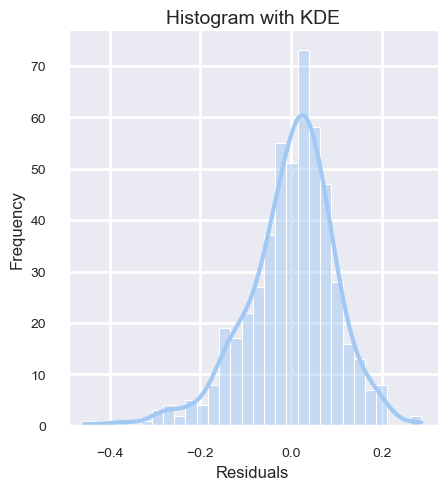

In [501]:
# Residual = Actual y - Predicted y

y_train_pred = lr_model.predict(X_train_sm)
residual = y_train - y_train_pred

sns.displot(residual, kind='hist', kde=True, bins=30)
plt.title('Histogram with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Quick observation
#-------------------
# 1. As the residuals are concentrated around 0, the inference we can make here is, the model's predictions are unbiased
# 2. Also looking at the kde line, the residuals are notmally distributed, which means the error terms are random. 
#    This aligns with the linear regression assumption of error terms should follow a normal distribution
#-------------------

## **8. Predictions and Evaluation**

In [502]:
df_test.describe()

# Quick observation
#-------------------
# 1. The min and max values on the numeric fields we used to scale are not 0 and 1.
# 2. The reason being the min and max scaler is computed based on the training dataframe, hence there's a slight difference
#-------------------

,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.56,0.53,0.64,0.31,0.52,0.26,0.25,0.24,0.10,0.05,0.09,0.09,0.10,0.10,0.06,0.09,0.09,0.07,0.09,0.13,0.17,0.10,0.16,0.18,0.12,0.32,0.03,0.00
std,0.23,0.22,0.15,0.16,0.22,0.44,0.43,0.43,0.30,0.23,0.29,0.28,0.29,0.31,0.24,0.28,0.28,0.26,0.28,0.33,0.37,0.30,0.37,0.38,0.32,0.47,0.16,0.00
min,0.05,0.03,0.26,-0.04,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.34,0.53,0.20,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.56,0.54,0.63,0.30,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.76,0.71,0.74,0.40,0.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,0.98,0.98,1.00,0.81,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [503]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Fall,Winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Mist_Cloudy,Light-Snow_Light-Rain,Heavy-Rain_Snow_Fog
184,1.00,0,1,0,0.83,0.77,0.66,0.08,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
535,1.00,1,0,1,0.90,0.84,0.61,0.15,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,1.00,0,0,1,0.51,0.50,0.84,0.33,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
221,1.00,0,0,1,0.88,0.80,0.44,0.34,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
152,1.00,0,0,1,0.82,0.74,0.31,0.54,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [504]:
# We have eliminated most of the columns from the training dataframe using RFE (Recursive Feature Elimination) method
# We need to have the same set of columns in the test dataframe too
# We can either drop the columns or slice the dataframe. I'm using the slice option.
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm.head()

,const,yr,holiday,temp,windspeed,Summer,Winter,Aug,Sep,Light-Snow_Light-Rain
184,1.00,0,1,0.83,0.08,0,0,0,0,0
535,1.00,1,0,0.90,0.15,1,0,0,0,0
299,1.00,0,0,0.51,0.33,0,1,0,0,0
221,1.00,0,0,0.88,0.34,0,0,1,0,0
152,1.00,0,0,0.82,0.54,1,0,0,0,0


In [505]:
# Use the linear regression model (lr_model object)
y_test_pred = lr_model.predict(X_test_sm)

In [506]:
training_r2_score = round(r2_score(y_true=y_train, y_pred=y_train_pred), 4)
test_r2_score = round(r2_score(y_true=y_test, y_pred=y_test_pred), 4)

print(f"Training R2 Score = {training_r2_score}")
print(f"Test R2 Score = {test_r2_score}")

print(f"Difference: {training_r2_score} - {test_r2_score} = {round(training_r2_score - test_r2_score, 4)}")

# Quick observation
#-------------------
# 1. The difference between training and test R2 is ~0.03 (3%), which is negligible
# 2. For most real-world problem R2 value of 70% or more is good.
#-------------------

Training R2 Score = 0.8057
Test R2 Score = 0.7731
Difference: 0.8057 - 0.7731 = 0.0326


In [507]:
df_residuals = pd.DataFrame({'y_train_pred': y_train_pred, 'residual': residual})

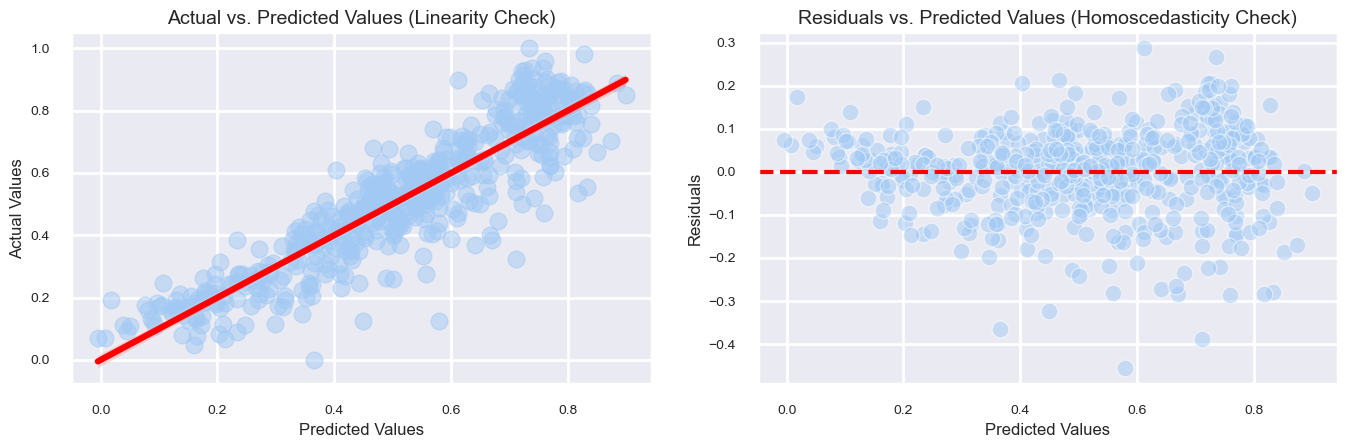

In [508]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Linearity Check: Actual vs. Predicted Values
sns.regplot(x=y_train_pred, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Actual Values')
axes[0].set_title('Actual vs. Predicted Values (Linearity Check)')

# Homoscedasticity Check: Residuals vs. Predicted Values
sns.scatterplot(x=y_train_pred, y=residual, alpha=0.5, ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--')  # Horizontal reference line at y=0
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs. Predicted Values (Homoscedasticity Check)')

plt.tight_layout()
plt.show()

#--------------------
# Quick Observation:
#--------------------
# Linearity: The actual values plotted is checked against the predicted values in the blow graph, are 
# well aligned with the regression line marked in solid red. This pattern shows the linearity between 
# the prediction and the actual data.

# Homoscedasticity: In linear regression, one of the key assumptions is that the variance of the 
# residuals (errors) remains constant across all levels of the predicted values. Observing the 
# scattered plot in the below image, the residuals are randomly scattered compared to the 
# prediction proving the linear regression assumption is true.

## **9. Conclusion**

- The analysis and modeling successfully addressed the objective of understanding the demand for shared bikes based on various independent variables. 
- By performing exploratory data analysis, preparing the data, and building a multiple linear regression model, we identified key factors influencing bike demand. 
- The model achieved a high R² value of **80%** on the training data and **77%** on the test data, indicating that it explains a significant portion of the variance in bike demand. 

- Additionally, residual analysis confirmed the model's assumptions, ensuring reliability. 
- Furthermore, the model can serve as a valuable tool for predicting demand dynamics in new markets.